<a href="https://colab.research.google.com/github/serafinazhang/Urban-Sound-Classification/blob/main/Urban_Sound_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Urban Sound Classification with Neural Networks**

# Preparation

In [1]:
!pip install librosa

In [2]:
import librosa
import librosa.display
import pandas as pd
import tarfile
from google.colab import drive
import numpy as np
import os
from collections import defaultdict, Counter

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
file = tarfile.open("/content/drive/MyDrive/machine learning/UrbanSound8K.tar.gz")
file.extractall('/content/')

In [8]:
label = pd.read_csv('/content/UrbanSound8K/metadata/UrbanSound8K.csv')
label_dict = defaultdict()
for i in range(len(label)):
  label_dict[label['slice_file_name'][i]] = label['classID'][i]

In [9]:
train_fold = ['fold1', 'fold2', 'fold3', 'fold4', 'fold6']
test_fold = ['fold5', 'fold7', 'fold8', 'fold9', 'fold10']

In [10]:
# train set
path = '/content/UrbanSound8K/audio/'
path_list_train = []
label_train = []
for i in train_fold:
  this_path = os.path.join(path,i)
  for root, dirs, files_name_train in os.walk(this_path):
    files_name_train.remove('.DS_Store')
    for file in files_name_train:
        path_list_train.append(os.path.join(root,file))
        label_train.append(label_dict[file])

In [11]:
# test set
path_list_test = []
label_test = []
for i in test_fold:
  this_path = os.path.join(path,i)
  for root, dirs, files_name_test in os.walk(this_path):
    files_name_test.remove('.DS_Store')
    for file in files_name_test:
        path_list_test.append(os.path.join(root,file))
        label_test.append(label_dict[file])

In [116]:
label[100:200]

,slice_file_name,fsID,start,end,salience,fold,classID,class
100,102102-3-0-0.wav,102102,1.573952,4.673824,2,4,3,dog_bark
101,102103-3-0-0.wav,102103,1.976030,2.508892,2,10,3,dog_bark
102,102103-3-1-0.wav,102103,4.179637,4.568182,2,10,3,dog_bark
103,102104-3-0-0.wav,102104,2.429279,3.241121,2,2,3,dog_bark
104,102105-3-0-0.wav,102105,2.041889,6.041889,2,3,3,dog_bark
...,...,...,...,...,...,...,...,...
195,103076-3-2-0.wav,103076,10.265534,10.717475,1,8,3,dog_bark
196,103199-4-0-0.wav,103199,0.000000,4.000000,1,3,4,drilling
197,103199-4-0-3.wav,103199,1.500000,5.500000,1,3,4,drilling
198,103199-4-0-4.wav,103199,2.000000,6.000000,1,3,4,drilling


# Data Visualization

- Mel-Frequency spectrogram for 10 samples from different classes
- Chromagram for 10 samples from different classes
- t-SNE or 

In [125]:
sound_file1, sampling_rate1 = librosa.load('/content/UrbanSound8K/audio/fold4/102102-3-0-0.wav')
sound_file2, sampling_rate2 = librosa.load('/content/UrbanSound8K/audio/fold3/103199-4-0-0.wav')
sound_file3, sampling_rate3 = librosa.load('/content/UrbanSound8K/audio/fold3/102105-3-0-0.wav')
sound_file4, sampling_rate4 = librosa.load('/content/UrbanSound8K/audio/fold3/103199-4-0-5.wav')

In [126]:
S1 = librosa.feature.melspectrogram(y=sound_file1, n_mels=128,fmax=8000)
S2 = librosa.feature.melspectrogram(y=sound_file2, n_mels=128,fmax=8000)
S3 = librosa.feature.melspectrogram(y=sound_file3, n_mels=128,fmax=8000)
S4 = librosa.feature.melspectrogram(y=sound_file4, n_mels=128,fmax=8000)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

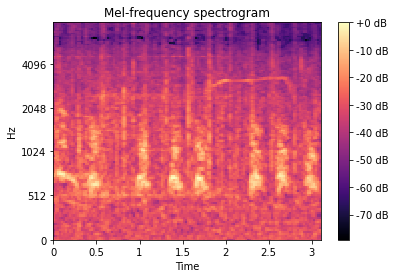

In [120]:
#dog bark
import matplotlib.pyplot as plt
import librosa.display
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S1, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel',
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

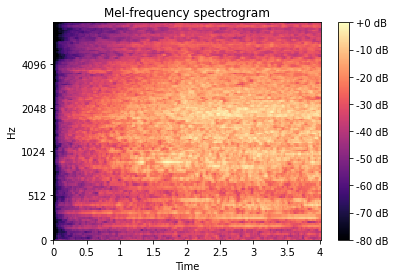

In [121]:
# drilling
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S2, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel',
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

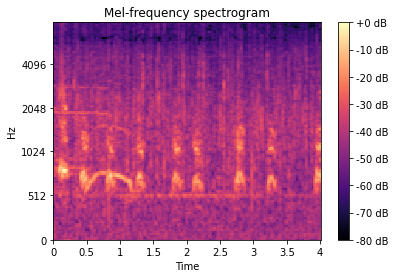

In [124]:
# dog bark
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S3, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel',
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

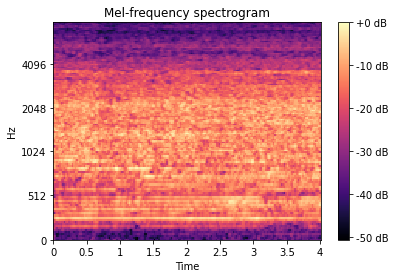

In [127]:
# 
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S4, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel',
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')